In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
train.drop(columns=['keyword', 'location'], inplace=True)

In [14]:
from nltk.corpus import stopwords

In [15]:
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
print(train['text'])

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object


In [33]:
tokens=nltk.word_tokenize(train.loc[0]['text'])
tokens

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#',
 'earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [20]:
tokens=[token.lower() for token in tokens if len(token)>1]
tokens

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all']

In [21]:
tokens_bigram=nltk.bigrams(tokens)
for token in tokens_bigram :
    print(token)

('our', 'deeds')
('deeds', 'are')
('are', 'the')
('the', 'reason')
('reason', 'of')
('of', 'this')
('this', 'earthquake')
('earthquake', 'may')
('may', 'allah')
('allah', 'forgive')
('forgive', 'us')
('us', 'all')


In [24]:
tokens_clean=[token for token in tokens if not token in stop_words]
tokens_clean

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']

In [25]:
tokens_tagged=nltk.pos_tag(tokens_clean)
print(tokens_tagged)

[('deeds', 'NNS'), ('reason', 'NN'), ('earthquake', 'NN'), ('may', 'MD'), ('allah', 'VB'), ('forgive', 'JJ'), ('us', 'PRP')]


In [26]:
tokens_noun=[word for word,pos in tokens_tagged
            if pos in ['NN','NNP']]
print(tokens_noun)

['reason', 'earthquake']


In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [45]:
stopwords=set(STOPWORDS)
wc=WordCloud(background_color="white",max_font_size=100,max_words=50,stopwords=stopwords)

In [46]:
text_data=train['text'].str.cat(sep=',')
wordcloud=wc.generate(text_data)

(-0.5, 399.5, 199.5, -0.5)

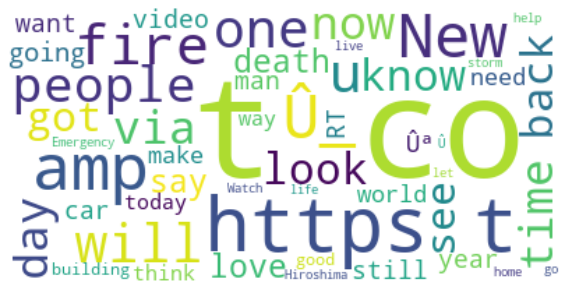

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

In [48]:
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')